# Which One is a Better Plan?

**As an analyst for the telecom operator Megaline,** I will be doing an analysis for the commerical department on which pre-paid plan (Surf or Ultimate) brings in more revenue Megaline can adjust the advertising budget accordingly.

I will be conducting this analysis using a sample of 500 Megaline clients from 2018. The data set I will be working with contains information such as who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent.

For context, the plans have the following terms and conditions - 

- **Surf**
  - Monthly charge: \$20
  - 500 monthly minutes, 50 texts, and 15 GB of data
  - After exceeding the package limits:
      - 1 minute: 3 cents
      - 1 text message: 3 cents
      - 1 GB of data: \$10
- **Ultimate**
  - Monthly charge: \$70
  - 3000 monthly minutes, 1000 text messages, and 30 GB of data
  - After exceeding the package limits:
      * 1 minute: 1 cent
      * 1 text message: 1 cent
      * 1 GB of data: \$7

For my exploratory data analysis, I will be performing the following steps - 

- **Step 1**: Read in the data files and study the general information in those files
- **Step 2**: Preprocess the data by doing the following:
  - Verify and fix data types 
  - Identify and fill in missing values
  - Identify and remove duplicate values
  - Find and eliminate errors in the data
- **Step 3**: Aggregate User Level Metrics
  -  Generate metrics such as monthly calls made, minutes used per month, texts sent per month, and more.
- **Step 4**: Describe the customers' behavior by analyzing the data
  - After finding the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions. 
- **Step 5**: Test the hypotheses
  - The average revenue from users of Ultimate and Surf calling plans differs. The average revenue from users in NY-NJ area is different from that of the users from other regions. Decide what alpha value and explain the hypotheses and the results of the statistical tests run on the data set.
- **Step 6**: Summarize Findings and Make a Conclusion

Please see my findings below. 


## Initialization

In [1]:
# Loading all the libraries required for this project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from scipy import stats as st

#Show all columns when displaying dataframe
pd.set_option('display.max_columns', None)

## Load Data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv') 
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the Data

In sections 1.4 through 1.10, I will analyze each table used in the analysis and describe any changes I make to the tables that will allow me to more effectlively and accurately determine which pre-paid plan brings in more revenue for telecom operator Megaline. 

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

# Check for missing values
plans.isna().sum()

# Check data types 
plans.info()

# Descibe plans
plans.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surf
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142,NaN
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000,NaN
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000,NaN
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000,NaN


In [4]:
# Print a sample of data for plans

# Check head 
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


plan_name should be changed from object to string. There are no missing values or duplicate values. Data in the table matches to the information provided in the exercise prompt. There aren't any duplicate values.

### Fix data

Convert plan_name from object to string

In [5]:
#Convert plan_name from object to string
plans['plan_name'] = plans['plan_name'].astype('string')

# Check data types after change
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      string 
dtypes: float64(2), int64(5), string(1)
memory usage: 256.0 bytes


### Enrich data

Adding in an additional column called gb_per_month_included. Adding this field because other fields are based on gigabytes and not megabytes. Will used in calculating monthy revenue. 

In [6]:
# Divide mb by 1024 to get gb
def mb_to_gb(plans):
    return (plans/1024)

# Create a column gb_per_month_included to be used in later analysis. Convert values to integer 
plans['gb_per_month_included'] = plans['mb_per_month_included'].apply(mb_to_gb).astype(int)

# Print head to see column
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Users

In [7]:
# Print the general/summary information about the users' DataFrame

# Check for missing values
users.isna().sum()

# Check data types 
users.info()

# Check for duplicates in all rows, id, and user_id
users[users.duplicated(keep=False)]
users[users.duplicated(subset=['first_name','last_name'], keep=False)].sort_values(by='user_id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


In [8]:
# Print a sample of data for users

# Check head 
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


There are missing values in the churn_date column, but these are missing only because these users have not yet churned - These are ok to leave as null values for the moment. Later in the analysis, I will handle NULL churn dates. Convert user_id, first_name, last_name, city, and plan to strings. Convert reg_date and churn_date to datetime. There aren't any duplicate users in the table based on first and last name.


### Fix Data

Convert data types from intial data load

In [9]:
# Convert reg_date and churn_date to datetime
users['reg_date'] = users['reg_date'].astype('datetime64')
users['churn_date'] = users['churn_date'].astype('datetime64')

# Convert user_id, first_name, last_name, city, and plan to strings
users['user_id'] = users['user_id'].astype('string')
users['first_name'] = users['first_name'].astype('string')
users['last_name'] = users['last_name'].astype('string')
users['city'] = users['city'].astype('string')
users['plan'] = users['plan'].astype('string')

# Check data types after change
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    string        
 1   first_name  500 non-null    string        
 2   last_name   500 non-null    string        
 3   age         500 non-null    int64         
 4   city        500 non-null    string        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    string        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), string(5)
memory usage: 31.4 KB


### Enrich Data

Adding in a column called 'State' and 'NY_NJ'. One of the questions I will be answer is - What is the average revenue from users in NY-NJ area is different from that of the users from other regions? For this, I will need to know if the user is in the NY-NJ area. To do this, I will first parse city to get the state(s) associated with the user. From the 'State' field I will assume that if the city contains NY or NJ, then the user is in the NY-NJ area. If the city doesn't contain NY-NJ then the value in the NY-NJ will be set to 'Other'. New fields will be added to the original users df.
<br>
Also creating a column for start/sign-up month and churn month so I can determine active months for each user. To do this I will truncate reg_date to month and call it start_month. For missing, churn dates I will set the value to be 2099-01-01 so that I can do date logic furher along in the analysis so I properly calculate revenue. For example, I don't want to calculate revenue for a user for any months in 2018 after the time in which the user churned.

In [10]:
# Add a State field to users table
# Split city and take the [1] index which contains the state and replace 'MSA' with a whitespace
users['state'] = users['city'].str.split(',',expand=True)[1].str.replace('MSA','').str.strip()
    
# If a state has NJ or NY in it then print "NY-NJ"
def map_state(state):
   if 'NY' in state or 'NJ' in state :
    return "NY-NJ"
   else:
     return 'Other'

# Create a column called NY_NJ to be used in later analysis about 
# The average revenue from users in NY-NJ area is different from that of the users from other regions.
users["NY_NJ"] = users['city'].apply(map_state)

# Replace churn_date with a value far in the future 
# Because we know the data set is for 2018 we can assume that they haven't churned yet if the date is set after 2018
# Replace NULL values with "2099-01-01" for ease of working with user data in later section
users['churn_date'].fillna('2099-01-01', inplace = True)


# Create a column for start month and churn month so I can determine active months for the user
users['churn_date']= pd.to_datetime(users['churn_date'])
users['churn_month'] = users['churn_date'].dt.to_period('M').dt.to_timestamp()
users['start_month'] = users['reg_date'].dt.to_period('M').dt.to_timestamp()


# Check new users df
users.head(20)

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,NY_NJ,churn_month,start_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2099-01-01,GA,Other,2099-01-01,2018-12-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2099-01-01,WA,Other,2099-01-01,2018-08-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2099-01-01,NV,Other,2099-01-01,2018-10-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2099-01-01,OK,Other,2099-01-01,2018-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2099-01-01,WA,Other,2099-01-01,2018-05-01
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2099-01-01,TX,Other,2099-01-01,2018-11-01
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,CA,Other,2018-12-01,2018-11-01
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2099-01-01,MI,Other,2099-01-01,2018-07-01
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2099-01-01,FL,Other,2099-01-01,2018-08-01
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2099-01-01,CA,Other,2099-01-01,2018-04-01


## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame

# Check head 
calls.head()

# Check for missing values
calls.isna().sum()

# Check data types 
calls.info()

# Describe data
calls.describe(include = 'all')

# Check for duplicates in all rows, id, and user_id
calls[calls.duplicated(keep=False)]
calls[calls.duplicated(subset=['user_id','id'], keep=False)].sort_values(by='user_id')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration


In [12]:
# Print a sample of data for calls
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


After looking at the calls table, none of the fields have missing data and there are no duplicates that take away from the integrity of the data set. There are duplicate rows where user_id is the same but that is ok since users can make multiple calls. Wil convert call_date to datetime from object and convert user_id from integer to string in case leading digits or zeros were lost do to being an integer. id can be changed to a string, but call_duration can remain a float since it represents minutes spent on a call.

### Fix data

Convert data types from intial data load

In [13]:
# Convert data types 

# Convert the 'call_date' column to datetime format
calls['call_date'] = calls['call_date'].astype('datetime64')

# Convert the user_id, id column to string format
calls['user_id'] = calls['user_id'].astype('string')
calls['id'] = calls['id'].astype('string')

# Check data types after change
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  string        
 1   user_id    137735 non-null  string        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), string(2)
memory usage: 4.2 MB


### Enrich data

Create a field that extracts the month/year from each call_date and add to new columns called call_month. Required to understand how many calls a user makes a month. In this section, I will also round up call duration for individual calls to the nearest minute as per the plan requirements (Note this is different than internet rounding which is done at the monthly level and not at a session level).

In [14]:
# Truncate call_date to call_month
calls['call_month'] = calls['call_date'].dt.to_period('M').dt.to_timestamp()

# Round up individual call duration to the next minute if as plan requirement states that "Every individual call should be rounded up to the nearest minute, even if it lasts just one second".
calls['mins_per_call_rounded'] = np.ceil(calls.duration).astype(int)

# Check added field
calls.head()

,id,user_id,call_date,duration,call_month,mins_per_call_rounded
0,1000_93,1000,2018-12-27,8.52,2018-12-01,9
1,1000_145,1000,2018-12-27,13.66,2018-12-01,14
2,1000_247,1000,2018-12-27,14.48,2018-12-01,15
3,1000_309,1000,2018-12-28,5.76,2018-12-01,6
4,1000_380,1000,2018-12-30,4.22,2018-12-01,5


## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame

# Check head 
messages.head()

# Check for missing values
messages.isna().sum()

# Check data types 
messages.info()

# Describe data
messages.describe(include = 'all')

# Check for duplicates in all rows and within id
messages[messages.duplicated(keep=False)]
messages[messages.duplicated(subset=['id'], keep=False)].sort_values(by='user_id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date


In [16]:
# Print a sample of data for messages
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The messages dataframe doesn't have any missing values or fully duplicated rows. Message_date needs to be converted to a date and both id and user_id can be converted to a string.

### Fix data

Convert data types from intial data load

In [17]:
# Convert data types 

# Convert the 'call_date' column to datetime format
messages['message_date'] = messages['message_date'].astype('datetime64')

# Convert the user_id, id column to string format
messages['user_id'] = calls['user_id'].astype('string')
messages['id'] = calls['id'].astype('string')

# Check data types after change
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  string        
 1   user_id       76051 non-null  string        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), string(2)
memory usage: 1.7 MB


### Enrich data

Create a field that extracts the month/year from each message_date and add to new columns called message_month. Message month will be need to count the number of message a user has in a month

In [18]:
# Truncate message_date to message_month
messages['message_month'] = messages['message_date'].dt.to_period('M').dt.to_timestamp()

# Check added field
messages.head()

,id,user_id,message_date,message_month
0,1000_93,1000,2018-12-27,2018-12-01
1,1000_145,1000,2018-12-31,2018-12-01
2,1000_247,1000,2018-12-31,2018-12-01
3,1000_309,1000,2018-12-27,2018-12-01
4,1000_380,1000,2018-12-26,2018-12-01


## Internet

In [19]:
# Print the general/summary information about the internet DataFrame

# Check for missing values
internet.isna().sum()

# Check data types 
internet.info()

# Describe data
internet.describe(include = 'all')

# Check for duplicates in all rows, id, and user_id
internet[internet.duplicated(keep=False)]
internet[internet.duplicated(subset=['user_id','id'], keep=False)].sort_values(by='user_id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used


In [20]:
# Print a sample of data for the internet traffic

# Check head 
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


After looking at the internet table, none of the fields have missing data and there are no duplicates that take away from the integrity of the data set. There are duplicate rows where user_id is the same but that is ok since users can have multiple web sessions. Need to convert session_date to datetime from object and convert user_id and id to string in case leading digits or zeros were lost do to being an integer. I'm also going to create a new column called gb_used that converts mb_used to gigabytes since the plans are measured by Gb.

### Fix data

Convert data types from intial data load

In [21]:
# Convert data types 

# Convert the 'call_date' column to datetime format
internet['session_date'] = internet['session_date'].astype('datetime64')

# Convert the user_id, id column to string format
internet['user_id'] = internet['user_id'].astype('string')
internet['id'] = internet['id'].astype('string')

# Check data types after change
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  string        
 1   user_id       104825 non-null  string        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), string(2)
memory usage: 3.2 MB


### Enrich data

Adding an additional column called gb_used. Adding this field because other fields are based on gigabytes and not megabytes. To calculate plan overages for internet, mb needs to be converted to gb.

In [22]:
# Divide mb by 1024 to get gb
def mb_to_gb(plans):
    return (plans/1024)

# Create a column gb_used to be used in later analysis. Convert values to float since value will be small and a decimal. 
internet['gb_used'] = internet['mb_used'].apply(mb_to_gb).astype(float)

#Create a field that extracts the month/year from each session and add to new columns called gb_month
internet['gb_month'] = internet['session_date'].dt.to_period('M').dt.to_timestamp()

# Print head to see column
internet.head()

,id,user_id,session_date,mb_used,gb_used,gb_month
0,1000_13,1000,2018-12-29,89.86,0.087754,2018-12-01
1,1000_204,1000,2018-12-31,0.00,0.000000,2018-12-01
2,1000_379,1000,2018-12-28,660.40,0.644922,2018-12-01
3,1000_413,1000,2018-12-26,270.99,0.264639,2018-12-01
4,1000_442,1000,2018-12-27,880.22,0.859590,2018-12-01


## Study Plan Conditions

**Description of the Plans** <br>
*Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.*<br>
- **Surf**
  - Monthly charge: \$20
  - 500 monthly minutes, 50 texts, and 15 GB of data
  - After exceeding the package limits:
      - 1 minute: 3 cents
      - 1 text message: 3 cents
      - 1 GB of data: \$10
- **Ultimate**
  - Monthly charge: \$70
  - 3000 monthly minutes, 1000 text messages, and 30 GB of data
  - After exceeding the package limits:
      * 1 minute: 1 cent
      * 1 text message: 1 cent
      * 1 GB of data: \$7

In [23]:
# Print out the plan conditions and make sure they are clear for you

# Reorganize plans df in order of plan description for ease of reading
plans = plans[['plan_name','usd_monthly_pay','minutes_included','messages_included','gb_per_month_included','mb_per_month_included', 'usd_per_minute','usd_per_message','usd_per_gb']]

# Print plans
plans

,plan_name,usd_monthly_pay,minutes_included,messages_included,gb_per_month_included,mb_per_month_included,usd_per_minute,usd_per_message,usd_per_gb
0,surf,20,500,50,15,15360,0.03,0.03,10
1,ultimate,70,3000,1000,30,30720,0.01,0.01,7


## Aggregate data per user

Now that the data is clean, in this next section I will aggregate data per user per period in order to have just one record per user per period. This will ease the analysis when looking at monthly user data. 

In [24]:
# Calculate the number of calls made by each user per month. Save the result to variable monthly_calls_by_user.
monthly_calls_by_user = calls.groupby(['user_id','call_month'])['id'].count().to_frame(name='calls_per_month').reset_index()

# Show Results
monthly_calls_by_user.head()

,user_id,call_month,calls_per_month
0,1000,2018-12-01,16
1,1001,2018-08-01,27
2,1001,2018-09-01,49
3,1001,2018-10-01,65
4,1001,2018-11-01,64


In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.

# Calculate the duration spent on calls for each user per month. Save the result to variable monthly_minutes_by_user.
# Use rounded individual mins from calls enrichment section
monthly_minutes_by_user = calls.groupby(['user_id','call_month'])['mins_per_call_rounded'].sum().to_frame(name='mins_per_month_rounded').reset_index()

# Show Results
monthly_minutes_by_user.head()

,user_id,call_month,mins_per_month_rounded
0,1000,2018-12-01,124
1,1001,2018-08-01,182
2,1001,2018-09-01,315
3,1001,2018-10-01,393
4,1001,2018-11-01,426


In [26]:
# Calculate the number of messages sent by each user per month. Save the result.

# Calculate the number of messages for each user per month. Save the result to variable monthly_messages_by_user.
monthly_messages_by_user = messages.groupby(['user_id','message_month'])['id'].count().to_frame(name='messages_per_month').reset_index()

# Show Results
monthly_messages_by_user.head()

,user_id,message_month,messages_per_month
0,1000,2018-08-01,1
1,1000,2018-10-01,1
2,1000,2018-11-01,2
3,1000,2018-12-01,12
4,1001,2018-08-01,29


In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

# Calculate the gb used for each user per month. Save the result to variable monthly_gb_by_user.
monthly_gb_by_user = internet.groupby(['user_id','gb_month'])['gb_used'].sum().to_frame(name='sum_gb_used').reset_index()

# Round up the sum of GBs used. If there are 6.7569 GBs used then round to 7 GBs
monthly_gb_by_user['gb_per_month_rounded'] = np.ceil(monthly_gb_by_user.sum_gb_used)

# Show Results
monthly_gb_by_user.head()

,user_id,gb_month,sum_gb_used,gb_per_month_rounded
0,1000,2018-12-01,1.856904,2.0
1,1001,2018-08-01,6.756982,7.0
2,1001,2018-09-01,13.002754,14.0
3,1001,2018-10-01,21.807119,22.0
4,1001,2018-11-01,18.070605,19.0


**Important Assumptions About the Data & Data Enrichment** <br><br>
In this next block I will merge the user info with their usage related to calls, messages, and internet usage. But first, I will lay out some assumptions that will drive the next few sections - 
  -  First, I will reate a user base table
      - For this I will cross join user data with each month in 2018 to have a base table to join calls, messages, and internet to. The key for all of the merges will be the date the user is active on the plan
      - I need to have a month column that contains all months that a user was active so that I can appropriate join usage data to it
  - Months before a user's reg_date (start month) will be excluded and months after a users churn date (churn month) will be excluded
  - One important assumpiton that I am making is that a user will pay for the plan for the month they churn 
  - I am also assuming that the user will pay based on the month and not every 30 days. 
      - For example, if a user was created on 12/24/2018, the user will pay the plan fee for the month of December
      - For example, if a user churns on 12/24/2018, the user will pay for the plan fee and all overages for the month of December
  - Missing or null values for minutes, messages, or internet usage will be filled with 0 
      - The assumption here is that if a user is active on a plan but doesn't have usage data it's because their usage data isn't available for that month and I will assume they didn't have any calls, messages, or internet usage at that time 
  - I will convert NULL churn values to a date far in the future since we know the data set is just for 2018. Will make date operations more easy when not working with NULL dates
  

In [28]:
# Create a list of distinct months in 2018
distinct_months = pd.Series(users['start_month'].unique()).to_frame(name='active_month')

# Cross join each user in user df with each month from 2018 to get a base table of users and all months in 2018
# There will be more months for each user than they are active but I will handle this in the next few lines of code
users_raw = users.merge(distinct_months, how='cross')

# Create a function to flag for active months outside of reg_date and churn date to be removed
# Function will return 1 for the months that the user was active 
    # Active means the months between (and including) the user start month until their churn date or throughout 2018
def date_check(users_raw):
    if users_raw['active_month'] >= users_raw['start_month'] and users_raw['active_month'] <= users_raw['churn_month']:
        return 1
    else:
        return 0

# Apply function 
users_raw['date_flag'] = users_raw[['active_month', 'start_month','churn_month']].apply(date_check,axis = 1)

# Drop rows with a 0 in the flag to only include active months for each user 
# This will create a new base user table
users_raw = users_raw[users_raw['date_flag'] == 1]

In the next two cells, I will join the new user data frame with minute, message, and internet data. I will join usage information on the months that the user is active. I will handle null values in the second cell based on the assumption I made that if there is missing values, it means that the user hasn't had usage for that month but are paying for the plan

In [29]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# For either plan we only care about minutes/duration and not number of calls so I will not join to get number of calls

# Merge to get users and calls by month
user_calls = users_raw.merge(monthly_minutes_by_user, how='left'
                                                  , left_on=['user_id','active_month']
                                                  , right_on=['user_id','call_month'])

# Merge to get users, calls, minutes, messages by month
user_calls_mins_messages = user_calls.merge(monthly_messages_by_user, how='left'
                                                                         , left_on=['user_id','active_month']
                                                                         , right_on=['user_id','message_month'])

# Merge to get users, calls, minutes, messages, internet by month
user_plan_usage = user_calls_mins_messages.merge(monthly_gb_by_user, how='left'
                                                                   , left_on=['user_id','active_month']
                                                                   , right_on=['user_id','gb_month'])
# Print results
user_plan_usage.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,NY_NJ,churn_month,start_month,active_month,date_flag,call_month,mins_per_month_rounded,message_month,messages_per_month,gb_month,sum_gb_used,gb_per_month_rounded
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2099-01-01,GA,Other,2099-01-01,2018-12-01,2018-12-01,1,2018-12-01,124.0,2018-12-01,12.0,2018-12-01,1.856904,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2099-01-01,WA,Other,2099-01-01,2018-08-01,2018-12-01,1,2018-12-01,412.0,2018-12-01,72.0,2018-12-01,18.915215,19.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2099-01-01,WA,Other,2099-01-01,2018-08-01,2018-08-01,1,2018-08-01,182.0,2018-08-01,29.0,2018-08-01,6.756982,7.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2099-01-01,WA,Other,2099-01-01,2018-08-01,2018-10-01,1,2018-10-01,393.0,2018-10-01,61.0,2018-10-01,21.807119,22.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2099-01-01,WA,Other,2099-01-01,2018-08-01,2018-11-01,1,2018-11-01,426.0,2018-11-01,55.0,2018-11-01,18.070605,19.0


In [30]:
# Add the plan information

# Merge to get user plan usages with plans df
monthly_plan_usage = user_plan_usage.merge(plans, how = 'left', left_on = 'plan', right_on = 'plan_name')

# Print results
#monthly_plan_usage.head()

# Check for missing values in new base table 
monthly_plan_usage.isna().sum()

#There are instances where a user is active on a plan but has no activity - In these cases the user will still pay for the plan

# Replace null values in mins, messages, and gbs used with 0 after joining to data usage tables
monthly_plan_usage.fillna({'mins_per_month_rounded': '0'
                           , 'messages_per_month': '0'
                           , 'sum_gb_used': '0'
                           , 'gb_per_month_rounded': '0'}, inplace=True)

# Convert newly filled columns to integers
monthly_plan_usage['mins_per_month_rounded'] = monthly_plan_usage['mins_per_month_rounded'].astype(int)
monthly_plan_usage['messages_per_month'] = monthly_plan_usage['messages_per_month'].astype(int)
monthly_plan_usage['sum_gb_used'] = monthly_plan_usage['sum_gb_used'].astype(int)
monthly_plan_usage['gb_per_month_rounded'] = monthly_plan_usage['gb_per_month_rounded'].astype(int)

In the next cell, I will create a few functions that will allow me to calculate the monthly revenue for each user. To do this, I will subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan. To make this work a bit more organized and cleaner, I will create a new data frame that only inlucdes the fields that I will need for analysis called user_plan_usage_subset

In [31]:
# Calculate the monthly revenue for each user

# First take a subset of columns that will be used in the analysis
user_plan_usage_subset = monthly_plan_usage = monthly_plan_usage[['user_id','active_month','NY_NJ','plan','usd_monthly_pay','minutes_included','mins_per_month_rounded','messages_included','messages_per_month','gb_per_month_included','gb_per_month_rounded', 'usd_per_minute','usd_per_message','usd_per_gb']]

# Determine overages for minutes, texts, and gb per user/month

# Define function for cost on overages on gigabytes
def gb_overage(plan_info):
    if plan_info['gb_per_month_included'] - plan_info['gb_per_month_rounded'] < 0:
        return abs((plan_info['gb_per_month_included'] - plan_info['gb_per_month_rounded']) * plan_info['usd_per_gb'])
    else:
        return 0

# Define function for cost on overages on minutes
def min_overage(plan_info):
    if plan_info['minutes_included'] - plan_info['mins_per_month_rounded'] < 0:
        return abs((plan_info['minutes_included'] - plan_info['mins_per_month_rounded']) * plan_info['usd_per_minute'])
    else:
        return 0
    
# Define function for cost on overages on texts
def text_overage(plan_info):
    if plan_info['messages_included'] - plan_info['messages_per_month'] < 0:
        return abs((plan_info['messages_included'] - plan_info['messages_per_month']) * plan_info['usd_per_message'])
    else:
        return 0

# Calculate cost for gb overages
user_plan_usage_subset['gb_overage_cost'] = user_plan_usage_subset[['gb_per_month_included','gb_per_month_rounded','usd_per_gb']].apply(gb_overage,axis = 1)

# Calculate cost for min overages
user_plan_usage_subset['min_overage_cost'] = user_plan_usage_subset[['minutes_included','mins_per_month_rounded','usd_per_minute']].apply(min_overage,axis = 1)

# Calculate cost for text overages
user_plan_usage_subset['text_overage_cost'] = user_plan_usage_subset[['messages_included','messages_per_month','usd_per_message']].apply(text_overage,axis = 1)

# Create field sums up all of the monthly costs for each per user - base plan and overages
user_plan_usage_subset['final_monthly_plan_cost'] = user_plan_usage_subset[['usd_monthly_pay','gb_overage_cost','text_overage_cost','min_overage_cost']].sum(axis=1)

# Check a few rows to see if the calculation looks accurate
user_plan_usage_subset.head(20)

,user_id,active_month,NY_NJ,plan,usd_monthly_pay,minutes_included,mins_per_month_rounded,messages_included,messages_per_month,gb_per_month_included,gb_per_month_rounded,usd_per_minute,usd_per_message,usd_per_gb,gb_overage_cost,min_overage_cost,text_overage_cost,final_monthly_plan_cost
0,1000,2018-12-01,Other,ultimate,70,3000,124,1000,12,30,2,0.01,0.01,7,0,0.00,0.00,70.00
1,1001,2018-12-01,Other,surf,20,500,412,50,72,15,19,0.03,0.03,10,40,0.00,0.66,60.66
2,1001,2018-08-01,Other,surf,20,500,182,50,29,15,7,0.03,0.03,10,0,0.00,0.00,20.00
3,1001,2018-10-01,Other,surf,20,500,393,50,61,15,22,0.03,0.03,10,70,0.00,0.33,90.33
4,1001,2018-11-01,Other,surf,20,500,426,50,55,15,19,0.03,0.03,10,40,0.00,0.15,60.15
5,1001,2018-09-01,Other,surf,20,500,315,50,44,15,14,0.03,0.03,10,0,0.00,0.00,20.00
6,1002,2018-12-01,Other,surf,20,500,384,50,70,15,15,0.03,0.03,10,0,0.00,0.60,20.60
7,1002,2018-10-01,Other,surf,20,500,59,50,9,15,7,0.03,0.03,10,0,0.00,0.00,20.00
8,1002,2018-11-01,Other,surf,20,500,386,50,17,15,19,0.03,0.03,10,40,0.00,0.00,60.00
9,1003,2018-12-01,Other,surf,20,500,1104,50,29,15,27,0.03,0.03,10,120,18.12,0.00,158.12


## Study User Behaviour

In section 1.11, I will be performing some useful descriptive statistics for the aggregated and merged data and visualizing the results. I will be performing the same exercise for calls, messages, internet usage, and revenue.

### Calls

In [32]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# SURF - Create a df of average duration/mins by call month and plan
monthly_duration_by_plan_surf = user_plan_usage_subset[user_plan_usage_subset['plan']=='surf'].groupby('active_month')['mins_per_month_rounded'].mean().to_frame(name='surf_mins_per_month').reset_index()

# ULTIMATE - Create a df of average duration/mins by call month and plan
monthly_duration_by_plan_ultimate = user_plan_usage_subset[user_plan_usage_subset['plan']=='ultimate'].groupby('active_month')['mins_per_month_rounded'].mean().to_frame(name='ultimate_mins_per_month').reset_index()

# Merge both dataframes to get data in format suitable for plotting
monthly_duration_by_plan_merged = monthly_duration_by_plan_surf.merge(monthly_duration_by_plan_ultimate, how='left', on='active_month')

# Change call_month date format to be %m/%d/%Y 
monthly_duration_by_plan_merged['active_month'] = monthly_duration_by_plan_merged['active_month'].dt.strftime("%m/%d/%Y")

777

777

With the exception of January and February 2018 (and barely October 2018), on average, users on the surf plan spend more time on phone calls than users on the ultimate plan. In the exception months I highlighted above, on average, users on the ultimate plan spend more time on phone calls than users on the surf plan. 

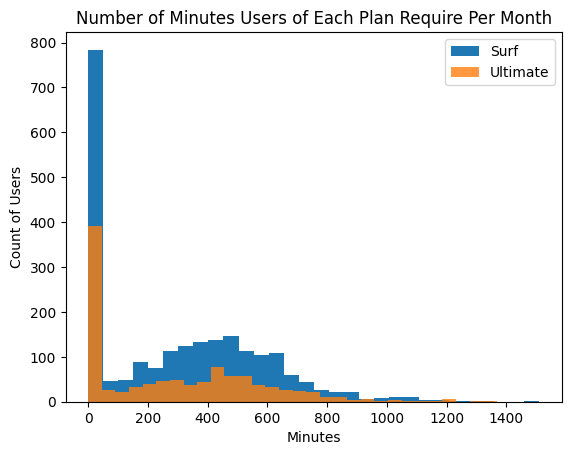

In [33]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Get mins per user per month for surf plan 
user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['mins_per_month_rounded'].plot(kind='hist', bins=30)

# Get mins per user per month for surf ultimate plan  
# Include an alpha value so we can fully see both histograms
user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['mins_per_month_rounded'].plot(kind='hist', bins=30, alpha=0.8)

# Set legend values
plt.legend(['Surf', 'Ultimate'])

# Set Axis and Title
plt.xlabel('Minutes')
plt.ylabel('Count of Users')
plt.title('Number of Minutes Users of Each Plan Require Per Month')

# Plot Histogram
plt.show()


The disttribution of minutes users use look similiar across the plans, however, there are more users on the surf plan than the ultimate plan. From the distribution, it looks like there are more users will need to pay overages on the surf plan because it only includes 500 minutes where as the ultimate plan includes 3000 mins per month, and no one is exceeding that in the 2018 data. 

In [34]:
# Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.
# Calculate the mean and the variance of the monthly call duration

# Calculate the mean and variance of surf
surf_mean = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['mins_per_month_rounded'].mean()
surf_variance = np.var(user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['mins_per_month_rounded'])

# Calculate the mean and variance of ultimate
ultimate_mean = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['mins_per_month_rounded'].mean()
ultimate_variance = np.var(user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['mins_per_month_rounded'])

# Print Results
print('For the Surf plan, the mean monthly call duration was',round(surf_mean,2), 'and the variance is',round(surf_variance,2))
print('For the Ultimate plan, the mean monthly call duration was',round(ultimate_mean,2), 'and the variance is',round(ultimate_variance,2))

For the Surf plan, the mean monthly call duration was 296.07 and the variance is 77480.1
For the Ultimate plan, the mean monthly call duration was 284.36 and the variance is 79790.24


Users on the surf plan on average have a higher monthly call duration than users on the ultimate plan 

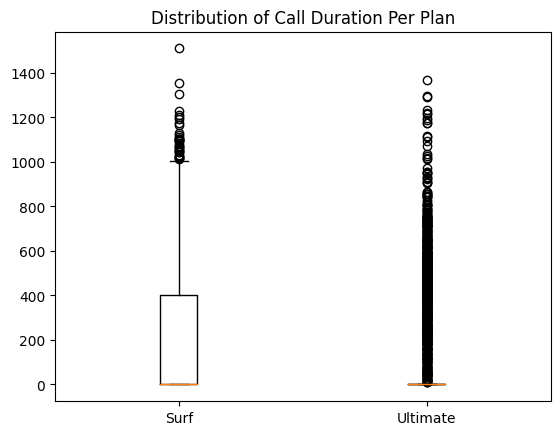

In [35]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Create df with duration by plan for all months combined 
call_duration = user_plan_usage_subset.pivot(columns='plan', values='mins_per_month_rounded').fillna(0)

# Add series label names
plt.boxplot(call_duration, labels = ['Surf','Ultimate'])

# Add title 
plt.title("Distribution of Call Duration Per Plan")

# Plot boxplot
plt.show()

In terms of the distribution of calls, it seems like users with 0 mins used in call duration is skewing the results, but regardless of the skew, those on the surf plan have a monthly and overall high call duration than those on the ultimate plan. 

### Messages

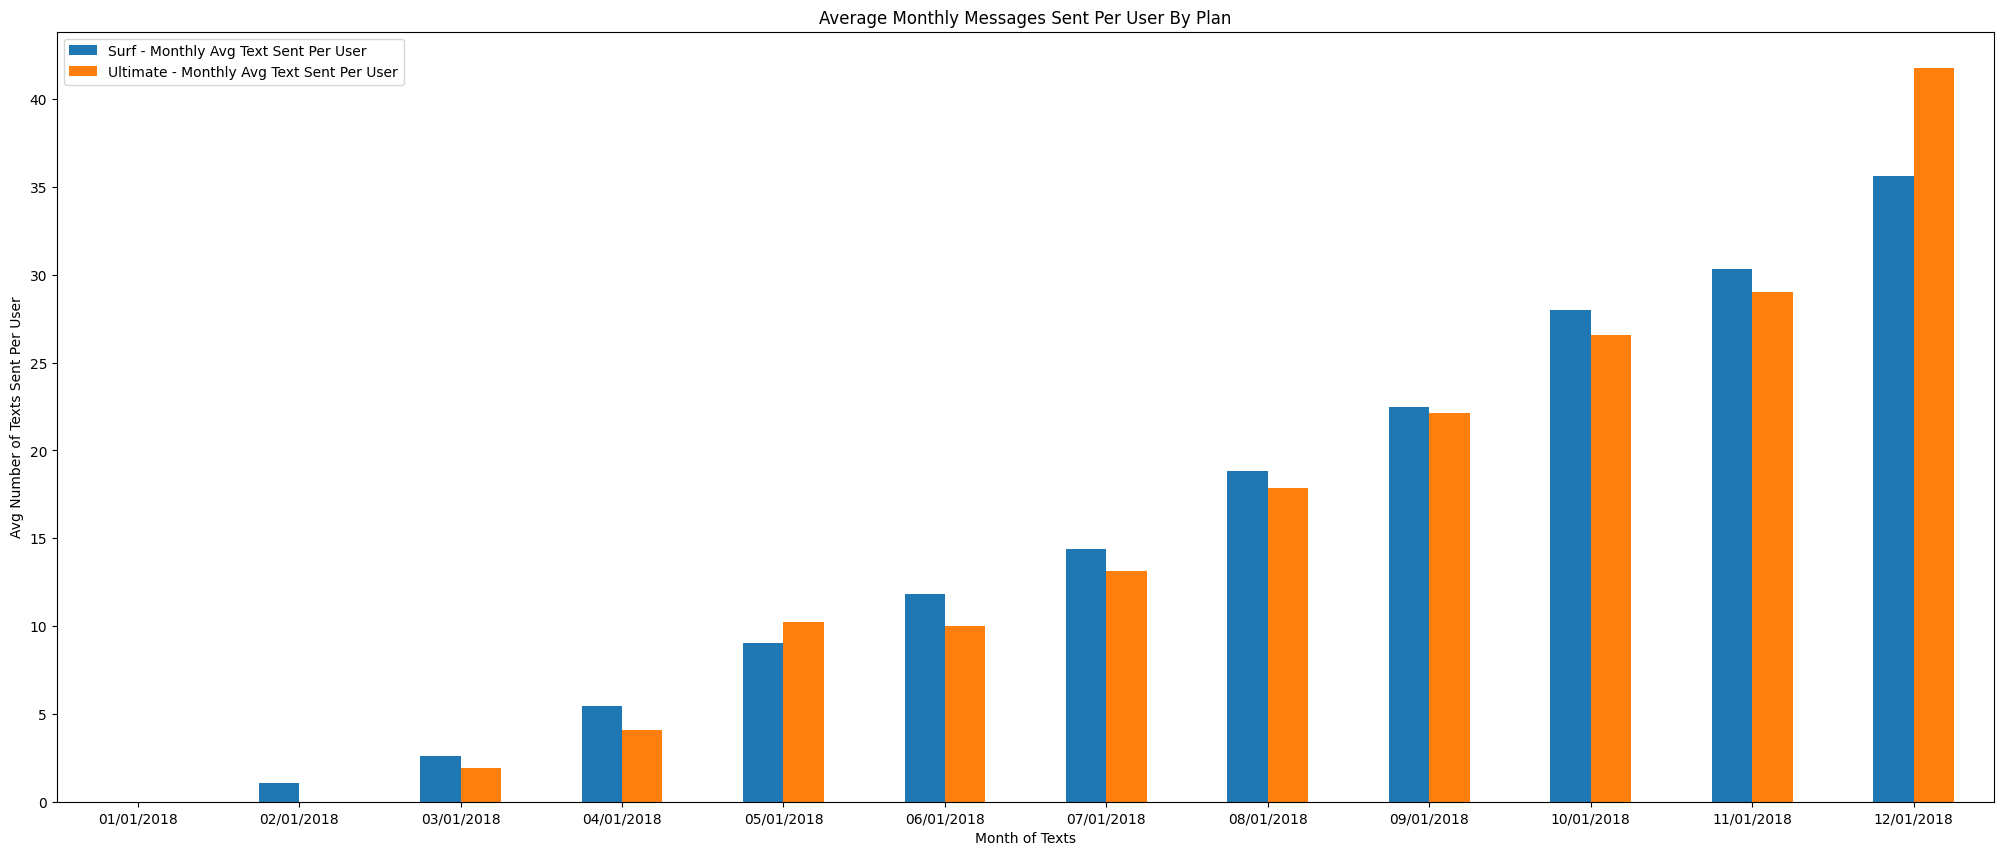

In [36]:
# Compare the number of messages users of each plan tend to send each month

# SURF - Create a df of sum of messages sent by call month and plan
monthly_messages_by_plan_surf = user_plan_usage_subset[user_plan_usage_subset['plan']=='surf'].groupby('active_month')['messages_per_month'].mean().to_frame(name='avg_surf_messages_sent_per_month').reset_index()

# ULTIMATE - Create a df of sum of messages sent by call month and plan
monthly_messages_by_plan_ultimate = user_plan_usage_subset[user_plan_usage_subset['plan']=='ultimate'].groupby('active_month')['messages_per_month'].mean().to_frame(name='avg_ultimate_messages_sent_per_month').reset_index()

# Merge both dataframes to get data in format suitable for plotting
monthly_messages_by_plan_merged = monthly_messages_by_plan_surf.merge(monthly_messages_by_plan_ultimate, how='left', on='active_month')

# Change call_month date format to be %m/%d/%Y 
monthly_messages_by_plan_merged['active_month'] = monthly_messages_by_plan_merged['active_month'].dt.strftime("%m/%d/%Y")


# Plot bar chart for monthly metrics
# Set configs for bar chart 
monthly_messages_by_plan_merged.plot(x = 'active_month'
                                     , y = ['avg_surf_messages_sent_per_month','avg_ultimate_messages_sent_per_month']
                                     , title = 'Average Monthly Messages Sent Per User By Plan'
                                     , xlabel = 'Month of Texts'
                                     , ylabel = 'Avg Number of Texts Sent Per User'
                                     , kind = 'bar'
                                     , rot = 0
                                     , figsize=(25,10)
                                     )

# Change legend/series titles
plt.legend(['Surf - Monthly Avg Text Sent Per User','Ultimate - Monthly Avg Text Sent Per User'])

# Show bar chart
plt.show() 

With the exception of May and December, those on the ultimate plan on average send more text messages per month

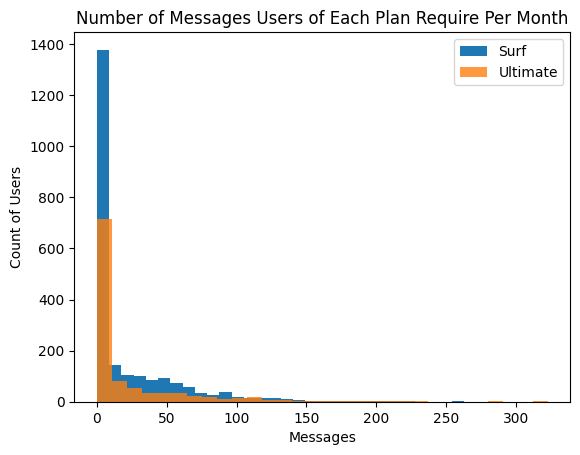

In [37]:
# Compare the number of messages users of each plan require each month. Plot a histogram.

# Get messages per user per month for surf plan 
user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['messages_per_month'].plot(kind='hist', bins=30)

# Get messages per user per month for surf ultimate plan  
# Include an alpha value so we can fully see both histograms
user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['messages_per_month'].plot(kind='hist', bins=30, alpha=0.8)

# Set legend values
plt.legend(['Surf', 'Ultimate'])

# Set Axis and Title
plt.xlabel('Messages')
plt.ylabel('Count of Users')
plt.title('Number of Messages Users of Each Plan Require Per Month')

# Plot Histogram
plt.show()

While those on the ultimate plan send more texts, these users have 1000 messages included in their plan so they don't ever exceed this value looking at all of the 2018 data

In [38]:
# Calculate the mean and the variance of the monthly messages sent

# Calculate the mean and variance of surf
surf_mean = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['messages_per_month'].mean()
surf_variance = np.var(user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['messages_per_month'])

# Calculate the mean and variance of ultimate
ultimate_mean = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['messages_per_month'].mean()
ultimate_variance = np.var(user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['messages_per_month'])

# Print Results
print('For the Surf plan, the mean monthly messages sent was',round(surf_mean,2), 'and the variance is',round(surf_variance,2))
print('For the Ultimate plan, the mean monthly messages sent was',round(ultimate_mean,2), 'and the variance is',round(ultimate_variance,2))

For the Surf plan, the mean monthly messages sent was 20.65 and the variance is 1262.64
For the Ultimate plan, the mean monthly messages sent was 20.79 and the variance is 1700.94


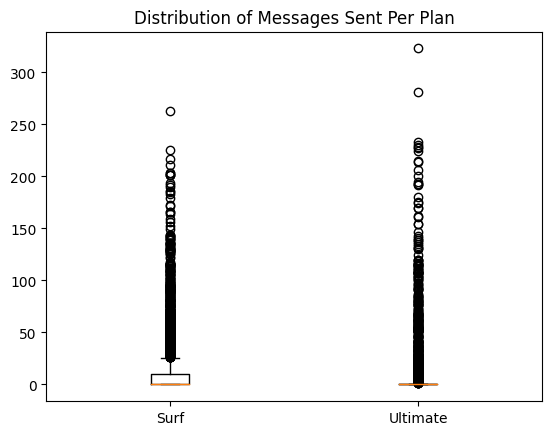

In [39]:
# Plot a boxplot to visualize the distribution of the monthly messages sent

# Create df with messages sent by plan for all months combined 
messages_sent = user_plan_usage_subset.pivot(columns='plan', values='messages_per_month').fillna(0)

# Add series label names
plt.boxplot(messages_sent, labels = ['Surf','Ultimate'])

# Add title 
plt.title("Distribution of Messages Sent Per Plan")

# Plot boxplot
plt.show()

Those on the ultimate plan tend to send more messages a month on average compared to those on the surf plan. The number of users with 0 messages is skewing the results to appear as though the means are near equal in terms of averages messages sent per month. 

### Internet

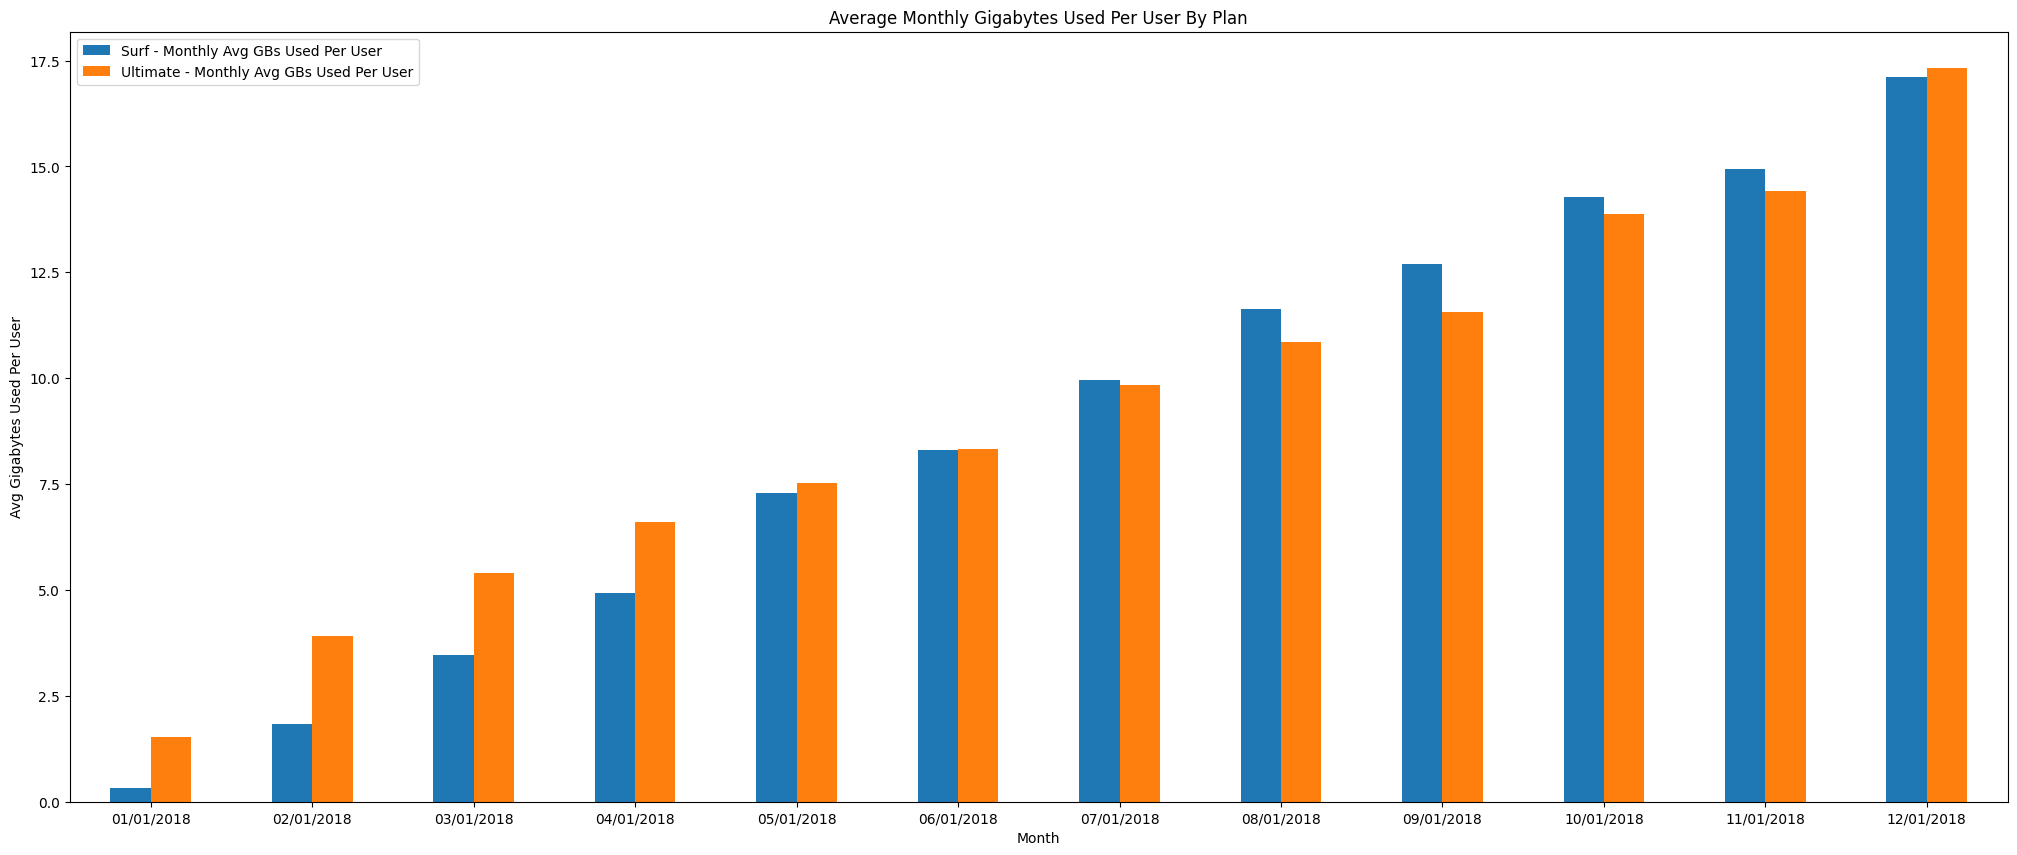

In [40]:
# Compare the amount of internet traffic consumed by users per plan

# SURF - Create a df of avg gbs used per month and plan
monthly_gb_by_plan_surf = user_plan_usage_subset[user_plan_usage_subset['plan']=='surf'].groupby('active_month')['gb_per_month_rounded'].mean().to_frame(name='avg_surf_gb_used_per_month').reset_index()

# ULTIMATE - Create a df of avg gbs used per month and plan
monthly_gb_by_plan_ultimate = user_plan_usage_subset[user_plan_usage_subset['plan']=='ultimate'].groupby('active_month')['gb_per_month_rounded'].mean().to_frame(name='avg_ultimate_gb_used_per_month').reset_index()

# Merge both dataframes to get data in format suitable for plotting
monthly_gb_by_plan_merged = monthly_gb_by_plan_surf.merge(monthly_gb_by_plan_ultimate, how='left', on='active_month')

# Change call_month date format to be %m/%d/%Y 
monthly_gb_by_plan_merged['active_month'] = monthly_gb_by_plan_merged['active_month'].dt.strftime("%m/%d/%Y")


# Plot bar chart for monthly metrics
# Set configs for bar chart 
monthly_gb_by_plan_merged.plot(x = 'active_month'
                               , y = ['avg_surf_gb_used_per_month','avg_ultimate_gb_used_per_month']
                               , title = 'Average Monthly Gigabytes Used Per User By Plan'
                               , xlabel = 'Month'
                               , ylabel = 'Avg Gigabytes Used Per User'
                               , kind = 'bar'
                               , rot = 0
                               , figsize=(25,10)
                               )

# Change legend/series titles
plt.legend(['Surf - Monthly Avg GBs Used Per User','Ultimate - Monthly Avg GBs Used Per User'])

# Show bar chart
plt.show() 

It appears that internet consumption increases throughout 2018. In the later half of the year, on average, Ulitmate users use more GBs of data for internet usage. 

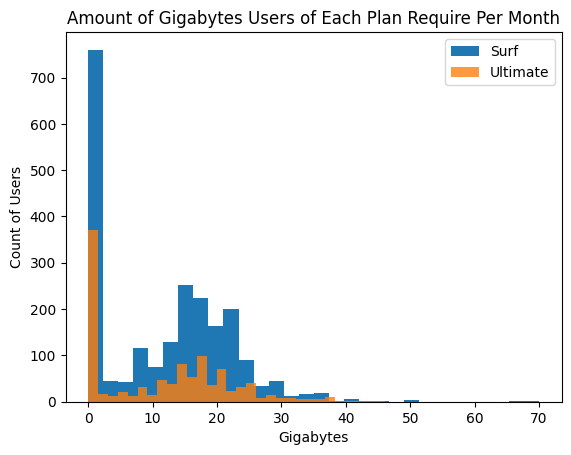

In [41]:
# Compare the amount of GBs users of each plan require each month. Plot a histogram.

# Get GBs per user per month for surf plan 
user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['gb_per_month_rounded'].plot(kind='hist', bins=30)

# Get GBs per user per month for surf ultimate plan  
# Include an alpha value so we can fully see both histograms
user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['gb_per_month_rounded'].plot(kind='hist', bins=30, alpha=0.8)

# Set legend values
plt.legend(['Surf', 'Ultimate'])

# Set Axis and Title
plt.xlabel('Gigabytes')
plt.ylabel('Count of Users')
plt.title('Amount of Gigabytes Users of Each Plan Require Per Month')

# Plot Histogram
plt.show()

The distribution looks similiar between users of both plans, but there are more ultimate users using internet than surf plan users

In [42]:
# Calculate the mean and the variance of the monthly gigabytes used

# Calculate the mean and variance of surf
surf_mean = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['gb_per_month_rounded'].mean()
surf_variance = np.var(user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['gb_per_month_rounded'])

# Calculate the mean and variance of ultimate
ultimate_mean = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['gb_per_month_rounded'].mean()
ultimate_variance = np.var(user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['gb_per_month_rounded'])

# Print Results
print('For the Surf plan, the mean monthly gigabytes used was',round(surf_mean,2), 'and the variance is',round(surf_variance,2))
print('For the Ultimate plan, the mean monthly gigabytes used was',round(ultimate_mean,2), 'and the variance is',round(ultimate_variance,2))

For the Surf plan, the mean monthly gigabytes used was 11.51 and the variance is 101.82
For the Ultimate plan, the mean monthly gigabytes used was 11.46 and the variance is 106.47


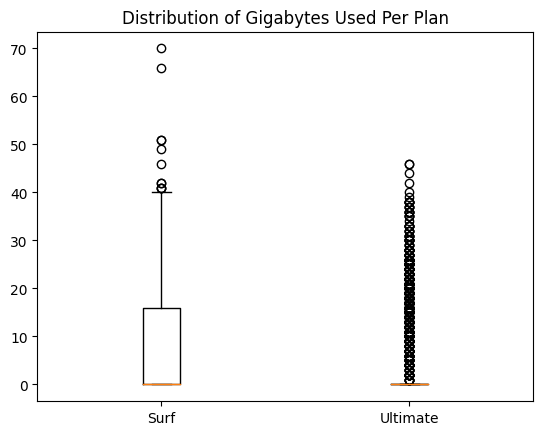

In [43]:
# Plot a boxplot to visualize the distribution of the gbs used 

# Create df with GBs used per plan for all months combined 
messages_sent = user_plan_usage_subset.pivot(columns='plan', values='gb_per_month_rounded').fillna(0)

# Add series label names
plt.boxplot(messages_sent, labels = ['Surf','Ultimate'])

# Add title 
plt.title("Distribution of Gigabytes Used Per Plan")

# Plot boxplot
plt.show()

There are more users on the ultimate plan using internet compared to the surf plan and these ultimate plan users tend to use more GBs that surf plan users

## Revenue

This section will look into the difference between the two groups in terms of revenue

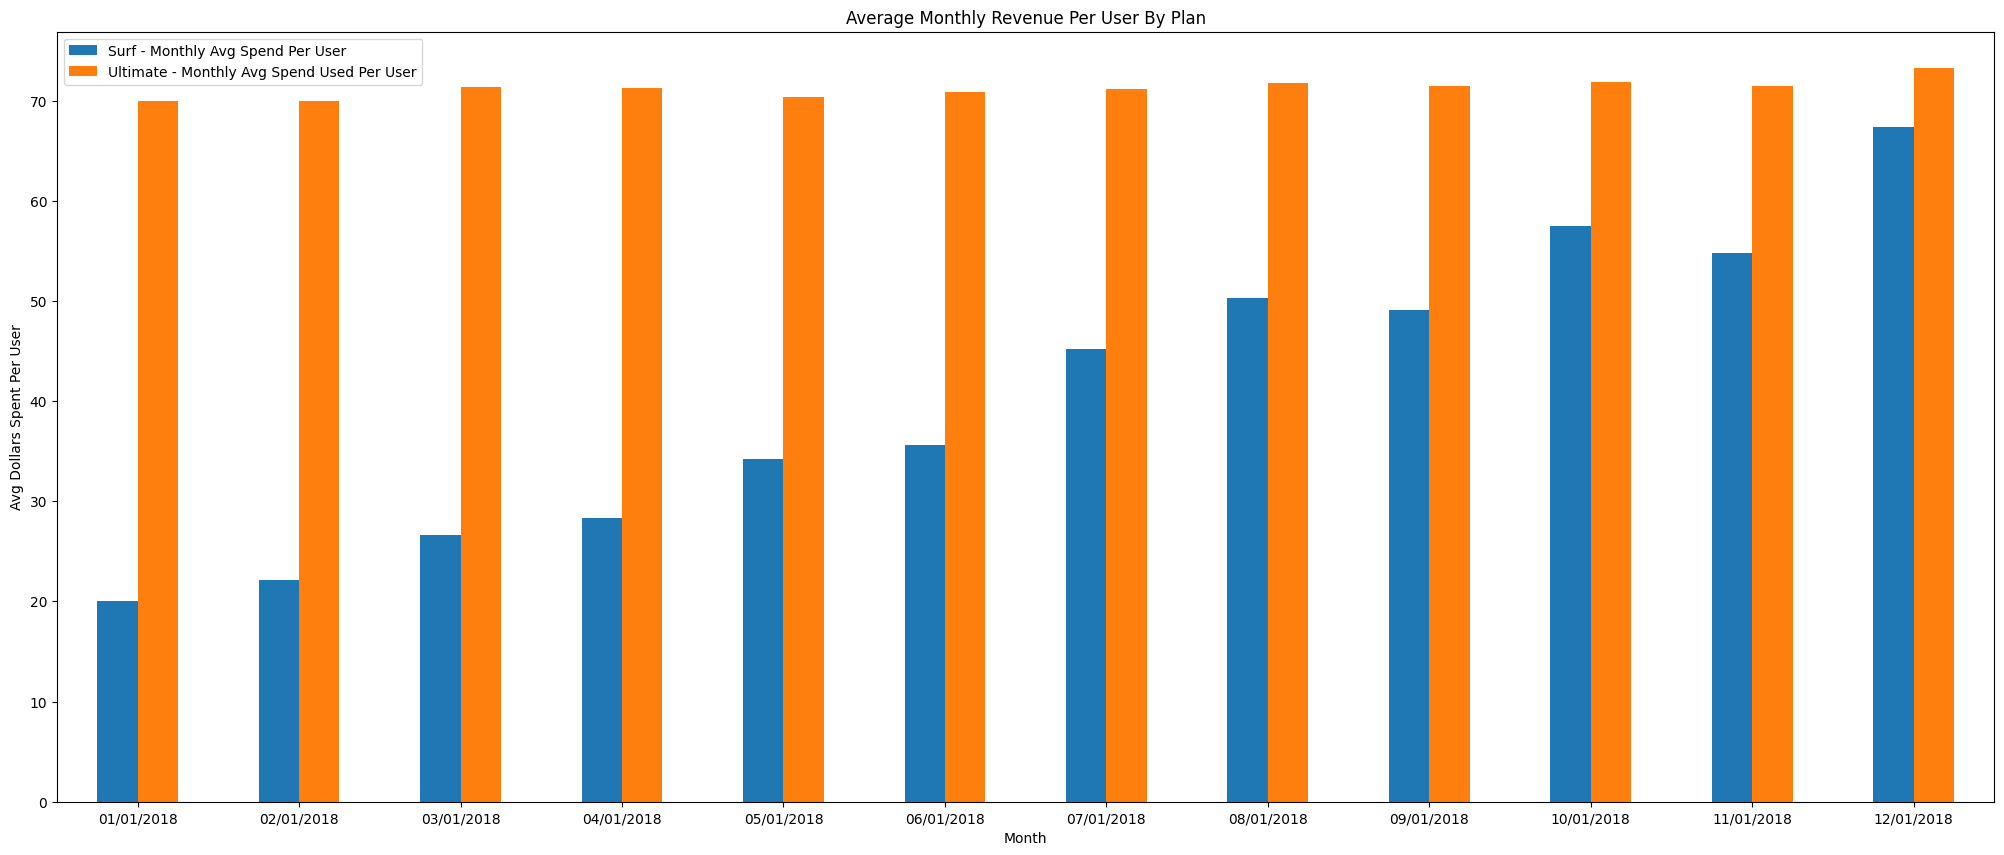

In [44]:
# Compare the amount of internet traffic consumed by users per plan

# SURF - Create a df of avg gbs used per month and plan
monthly_rev_by_plan_surf = user_plan_usage_subset[user_plan_usage_subset['plan']=='surf'].groupby('active_month')['final_monthly_plan_cost'].mean().to_frame(name='avg_surf_rev_per_month').reset_index()

# ULTIMATE - Create a df of avg gbs used per month and plan
monthly_rev_by_plan_ultimate = user_plan_usage_subset[user_plan_usage_subset['plan']=='ultimate'].groupby('active_month')['final_monthly_plan_cost'].mean().to_frame(name='avg_ultimate_rev_per_month').reset_index()

# Merge both dataframes to get data in format suitable for plotting
monthly_revenue_by_plan_merged = monthly_rev_by_plan_surf.merge(monthly_rev_by_plan_ultimate, how='left', on='active_month')

# Change call_month date format to be %m/%d/%Y 
monthly_revenue_by_plan_merged['active_month'] = monthly_revenue_by_plan_merged['active_month'].dt.strftime("%m/%d/%Y")


# Plot bar chart for monthly metrics
# Set configs for bar chart 
monthly_revenue_by_plan_merged.plot(x = 'active_month'
                                    , y = ['avg_surf_rev_per_month','avg_ultimate_rev_per_month']
                                    , title = 'Average Monthly Revenue Per User By Plan'
                                    , xlabel = 'Month'
                                    , ylabel = 'Avg Dollars Spent Per User'
                                    , kind = 'bar'
                                    , rot = 0
                                    , figsize=(25,10)
                                    )

# Change legend/series titles
plt.legend(['Surf - Monthly Avg Spend Per User','Ultimate - Monthly Avg Spend Used Per User'])

# Show bar chart
plt.show() 

Those users who are on the ulimate plan hover around $70 a month in terms of monthly payments. Users on the surf plan pay an initual plan fee of 20, but we see most months nearly double or exceed that 20 due to overages on call minutes, messages, or internet usage.

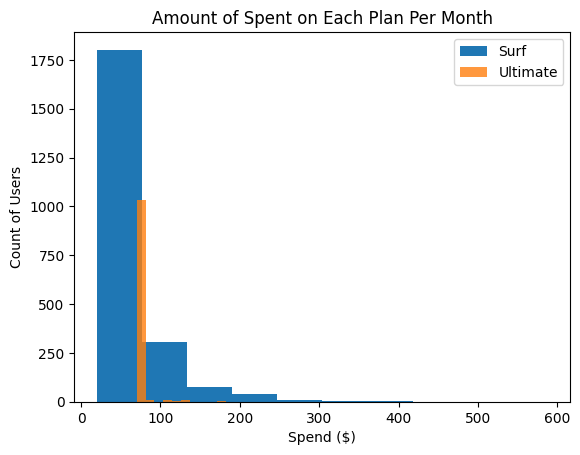

In [45]:
# Compare the amount of spent for each plan each month. Plot a histogram.

# Get spend per user per month for surf plan 
user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['final_monthly_plan_cost'].plot(kind='hist', bins=10)

# Get spend per user per month for surf ultimate plan  
# Include an alpha value so we can fully see both histograms
user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['final_monthly_plan_cost'].plot(kind='hist', bins=10, alpha=0.8)

# Set legend values
plt.legend(['Surf', 'Ultimate'])

# Set Axis and Title
plt.xlabel('Spend ($)')
plt.ylabel('Count of Users')
plt.title('Amount of Spent on Each Plan Per Month')

# Plot Histogram
plt.show()

In [46]:
# Calculate the mean and the variance of the monthly spend per plan

# Calculate the mean and variance of surf
surf_mean = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['final_monthly_plan_cost'].mean()
surf_variance = np.var(user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['final_monthly_plan_cost'])

# Calculate the mean and variance of ultimate
ultimate_mean = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['final_monthly_plan_cost'].mean()
ultimate_variance = np.var(user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['final_monthly_plan_cost'])

# Print Results
print('For the Surf plan, the mean monthly spend was',round(surf_mean,2), 'and the variance is',round(surf_variance,2))
print('For the Ultimate plan, the mean monthly spend was',round(ultimate_mean,2), 'and the variance is',round(ultimate_variance,2))

For the Surf plan, the mean monthly spend was 48.11 and the variance is 2470.09
For the Ultimate plan, the mean monthly spend was 71.56 and the variance is 88.35


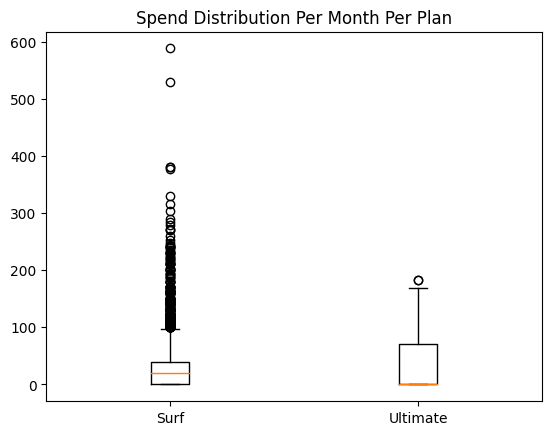

In [47]:
# Plot a boxplot to visualize the distribution of spend 

# Create df with spend used per plan for all months combined 
messages_sent = user_plan_usage_subset.pivot(columns='plan', values='final_monthly_plan_cost').fillna(0)

# Add series label names
plt.boxplot(messages_sent, labels = ['Surf','Ultimate'])

# Add title 
plt.title("Spend Distribution Per Month Per Plan")

# Plot boxplot
plt.show()

Those users who are on the ulimate plan hover around \\$70 a month in terms of monthly payments. Users on the surf plan pay an initual plan fee of 20, but we see most months nearly double or exceed that 20 due to overages on call minutes, messages, or internet usage. Most users in the Surf plan pay around \$40 a month, however there are users that pay well over 100 a month. These users should consider switching plans if they are going to have overages for more than a few months.

## Test statistical hypotheses

In this next cell, I will be testing the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

In [48]:
# Test the hypotheses

# Null Hypothesis - "There is no difference in the average revenue between the Ultimate and Surf Calling Plans"
# Alternative Hypothesis - "There is a difference in the average revenue between the Ultimate and Surf Calling Plans"

# Get monthly surf revenue
# Take a random sample of 100 values because ultimate and surf list lengths are not equal
# There are more values for surf than there are ultimate
surf_revenue = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'surf']['final_monthly_plan_cost'].sample(n=200)

# Get monthly ultimate revenue
ultimate_revenue = user_plan_usage_subset[user_plan_usage_subset['plan'] == 'ultimate']['final_monthly_plan_cost'].sample(n=200)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

# In order to test the hypothesis that the means of the two statistical populations are equal based on samples taken from them, apply the method 
results = st.ttest_ind(surf_revenue, ultimate_revenue)

print('p-value: ', results.pvalue)
print('The average revenue for the Surf plan is',round(surf_revenue.mean(),2))
print('The average revenue for the Ultimate plan is',round(ultimate_revenue.mean(),2))

if results.pvalue < alpha:
    print("We reject the null hypothesis - There is a difference in the average revenue for users in each plan")
else:
    print("We can't reject the null hypothesis - There is no difference in the average revenue from users in each plan") 


p-value:  9.665323193568845e-08
The average revenue for the Surf plan is 50.53
The average revenue for the Ultimate plan is 73.57
We reject the null hypothesis - There is a difference in the average revenue for users in each plan


In this next cell, I will be testing the hypothesis that the that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

In [49]:
# Test the hypotheses

# Null Hypothesis - "There is no difference in the average revenue between users in the NY-NJ area and other areas"
# Alternative Hypothesis - "There is a difference in the average revenue between users in the NY-NJ area and other areas"

# Get monthly revenue for those in NY-NJ
# Take a random sample of 100 values because ultimate and surf list lengths are not equal
NY_NJ_revenue = user_plan_usage_subset[user_plan_usage_subset['NY_NJ'] == 'NY-NJ']['final_monthly_plan_cost'].sample(n=200)

# Get monthly revenue for those NOT in NY-NJ
other_revenue = user_plan_usage_subset[user_plan_usage_subset['NY_NJ'] == 'Other']['final_monthly_plan_cost'].sample(n=200)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

# In order to test the hypothesis that the means of the two statistical populations are equal based on samples taken from them, apply the method 
results = st.ttest_ind(NY_NJ_revenue, other_revenue)

print('p-value: ', results.pvalue)
print('The average revenue for those in NY-NJ is',round(surf_revenue.mean(),2))
print('The average revenue for those not in NY-NJ is',round(ultimate_revenue.mean(),2))

if results.pvalue < alpha:
    print("We reject the null hypothesis - There is a difference in the average revenue for users in different regions")
else:
    print("We can't reject the null hypothesis - There is no difference in the average revenue from users in NY/NJ and other regions of the United States") 


p-value:  0.9749283253728787
The average revenue for those in NY-NJ is 50.53
The average revenue for those not in NY-NJ is 73.57
We can't reject the null hypothesis - There is no difference in the average revenue from users in NY/NJ and other regions of the United States


## General Conclusions

### Assumptions
It's important to note the assumptions I made when beginning the analysis because these assumptions have a lot of incluence over the results of my analysis. Before getting into the general conclusions, these were the assumptions that I made
1. The months before a user's reg_date (start month) will be excluded and months after a users churn date (churn month) will be excluded from the analysis
2. A user will pay for the plan they are enrolled in for the month that they churn
    - For example, if a user was created on 12/24/2018, the user will pay the plan fee for the month of December
3. Users will pay based on the month and based on a 30/31 day rolling window/period.
    - For example, if a user enrolled for a plan on 12/24/2018, the user will pay the plan fee for the month of December
4. Missing or null values for any month that a user is actively enrolled in a plan for minutes, messages, or internet usage will be filled with 0
    - The assumption here is that if a user is active on a plan but doesn't have usage data it's because their usage data isn't available for that month and I will assume they didn't have any calls, messages, or internet usage at that time



### Conclusions
1. Per month in 2018, we see that Ulitmate plan users spend more on average for their plans than surf plan users, however, surf plan users pay more in overages that ultimate plan users. 
    - From the data, we can see these overages for surf plan users is largely attributed to GBs used for internet. Overages on internet for the surf plan cost 10 GB for every GB a user goes over the included amount of 15 GB. We don't see this for ultimate plan users. Looking at the box plot there are at least 25% of surf users that go over 15 GBs per month. This adds up fast. 
2. With a confidence interval of 95%, 
    - We see that there is a difference in the average revenue for users in each plan.
    - However, we do not see a difference in the average revenue for users when comparing users in the NY/NJ and other regions of the United States